# Capstone 2: Modeling

In this section, we will apply various Machine Learning models to our prepared and preprocessed dataset in order to predict our target variable. 

# Imports

Let's import our packages.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load data.

In [3]:
df = pd.read_csv('C:\\Users\\cssv9\\Desktop\\SB DS\\Capstone2\\df4.csv')
pd.set_option('display.max_columns', None)  

# Data Prep

In [4]:
df.head()

,Unnamed: 0,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,instant_bookable,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,logprice,host_response_time_a few days or more,host_response_time_not given,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,borough_Bronx,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten Island,property_type_Condominium (condo),property_type_Hotel,property_type_Loft,property_type_Other,property_type_Rental unit,property_type_Residential home,property_type_Serviced apartment,property_type_Townhouse,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bathroom_type_Private,bathroom_type_Shared,bathroom_type_Unavailable,neighbourhood_Bedford-Stuyvesant,neighbourhood_Williamsburg,neighbourhood_Harlem,neighbourhood_Bushwick,neighbourhood_Hell's Kitchen,neighbourhood_Upper West Side,neighbourhood_Upper East Side,neighbourhood_Midtown,neighbourhood_Crown Heights,neighbourhood_East Village,neighbourhood_East Harlem,neighbourhood_Lower East Side,neighbourhood_Greenpoint,neighbourhood_Chelsea,neighbourhood_Astoria,neighbourhood_Washington Heights,neighbourhood_West Village,neighbourhood_Flatbush,neighbourhood_Financial District,neighbourhood_East Flatbush,hv_email,hv_phone,hv_reviews,hv_govid,hv_offline_govid,has_kitchen,has_longtermstays,has_ac,has_hangers,has_freestreetparking
0,0,2.632292,-2.735106,-2.548797,0,-0.122108,1,1,0.435970,-0.742409,-1.033074,-0.333384,-0.419008,-0.471562,0.238578,0,0.276966,-0.005415,1,-0.085919,0.936040,1.143893,1.600597,0.484952,-0.291859,-0.270791,4.618901,0.168566,-0.245552,0.161901,-0.073968,0.018412,-0.160688,-0.070244,0.303321,-0.562332,-0.227618,-0.114459,-0.223109,-0.113416,0.569820,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1
1,1,2.544274,-1.986809,0.204588,0,-0.152289,1,1,-0.783705,-0.185644,0.201326,-0.333384,-0.419008,1.550263,-0.646193,0,-0.760723,-0.005450,1,-0.600355,-0.537985,-0.541910,0.638248,7.655149,3.831131,-0.270791,1.925747,-0.840034,1.061448,-0.162006,-0.386116,-0.224769,-0.080048,-0.018449,-0.091055,-0.010334,-0.272927,-0.183513,-0.223109,-0.113416,-0.629688,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1
2,2,2.486914,-1.986809,-1.973463,0,-0.152289,1,1,-1.179895,-0.920757,0.818526,1.024533,1.253475,0.539351,1.733124,0,-0.617594,-0.005415,1,-0.600355,-0.728182,-0.812843,0.609086,-0.431240,-0.220773,0.269954,2.455453,-0.906939,-0.331758,0.566785,0.598351,0.788483,0.484432,0.473595,-0.710788,0.794664,-0.272927,-0.183513,-0.223109,-0.113416,1.525287,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0
3,3,2.459223,0.351620,0.779922,0,-0.152289,1,0,0.631665,-0.694185,-0.415874,-0.333384,-0.419008,-0.471562,-0.741844,0,-0.724941,-0.005512,1,-0.497468,-0.490436,-0.391392,0.893417,9.288361,0.916603,0.810699,4.230258,-0.916975,0.674910,-0.499410,-1.322560,-1.785177,-0.429487,-1.080230,0.303321,-0.677332,-0.272927,-0.218040,-0.189368,-0.113416,-0.806431,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1
4,4,2.484936,0.351620,0.327874,0,-0.152289,1,1,1.328952,-0.382126,-1.033074,-0.333384,

Let's drop the column "**Unnamed: 0**".

In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.shape

(34866, 95)

Since we decided to use log of **price**, let's delete **price** column.

In [7]:
df = df.drop('price', axis=1)

# Target Variable

The goal of our project is to predict the price of listings.
<br><br>
However in the pre-processing stage, it was noticed that the data distribution of **price** was skewed to the right. In order to make it resemble a Gaussian distribution, we have taken the logarithm of the values in the column.

Now, let's move the **logprice** column up to the front fo the dataframe for ease of access during observations.

In [8]:
column_to_move_1 = df.pop('logprice')
df.insert(0, 'logprice', column_to_move_1)

In [9]:
df.head()

,logprice,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,instant_bookable,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_response_time_a few days or more,host_response_time_not given,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,borough_Bronx,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten Island,property_type_Condominium (condo),property_type_Hotel,property_type_Loft,property_type_Other,property_type_Rental unit,property_type_Residential home,property_type_Serviced apartment,property_type_Townhouse,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bathroom_type_Private,bathroom_type_Shared,bathroom_type_Unavailable,neighbourhood_Bedford-Stuyvesant,neighbourhood_Williamsburg,neighbourhood_Harlem,neighbourhood_Bushwick,neighbourhood_Hell's Kitchen,neighbourhood_Upper West Side,neighbourhood_Upper East Side,neighbourhood_Midtown,neighbourhood_Crown Heights,neighbourhood_East Village,neighbourhood_East Harlem,neighbourhood_Lower East Side,neighbourhood_Greenpoint,neighbourhood_Chelsea,neighbourhood_Astoria,neighbourhood_Washington Heights,neighbourhood_West Village,neighbourhood_Flatbush,neighbourhood_Financial District,neighbourhood_East Flatbush,hv_email,hv_phone,hv_reviews,hv_govid,hv_offline_govid,has_kitchen,has_longtermstays,has_ac,has_hangers,has_freestreetparking
0,0.569820,2.632292,-2.735106,-2.548797,0,-0.122108,1,1,0.435970,-0.742409,-1.033074,-0.333384,-0.419008,-0.471562,0,0.276966,-0.005415,1,-0.085919,0.936040,1.143893,1.600597,0.484952,-0.291859,-0.270791,4.618901,0.168566,-0.245552,0.161901,-0.073968,0.018412,-0.160688,-0.070244,0.303321,-0.562332,-0.227618,-0.114459,-0.223109,-0.113416,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1
1,-0.629688,2.544274,-1.986809,0.204588,0,-0.152289,1,1,-0.783705,-0.185644,0.201326,-0.333384,-0.419008,1.550263,0,-0.760723,-0.005450,1,-0.600355,-0.537985,-0.541910,0.638248,7.655149,3.831131,-0.270791,1.925747,-0.840034,1.061448,-0.162006,-0.386116,-0.224769,-0.080048,-0.018449,-0.091055,-0.010334,-0.272927,-0.183513,-0.223109,-0.113416,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1
2,1.525287,2.486914,-1.986809,-1.973463,0,-0.152289,1,1,-1.179895,-0.920757,0.818526,1.024533,1.253475,0.539351,0,-0.617594,-0.005415,1,-0.600355,-0.728182,-0.812843,0.609086,-0.431240,-0.220773,0.269954,2.455453,-0.906939,-0.331758,0.566785,0.598351,0.788483,0.484432,0.473595,-0.710788,0.794664,-0.272927,-0.183513,-0.223109,-0.113416,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0
3,-0.806431,2.459223,0.351620,0.779922,0,-0.152289,1,0,0.631665,-0.694185,-0.415874,-0.333384,-0.419008,-0.471562,0,-0.724941,-0.005512,1,-0.497468,-0.490436,-0.391392,0.893417,9.288361,0.916603,0.810699,4.230258,-0.916975,0.674910,-0.499410,-1.322560,-1.785177,-0.429487,-1.080230,0.303321,-0.677332,-0.272927,-0.218040,-0.189368,-0.113416,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1
4,-0.651283,2.484936,0.351620,0.327874,0,-0.152289,1,1,1.328952,-0.382126,-1.033074,-0.333384,-0.419008,-0.471562,0,-0.724941,-0.005512,1,-0.600355,-

Now, let's look at the mean and median of **logprice**.

In [10]:
df['logprice'].mean(), df['logprice'].median()

(1.8114167024036268e-15, -0.0657702528281755)

Let's look at the data distribution of **logprice** once again.

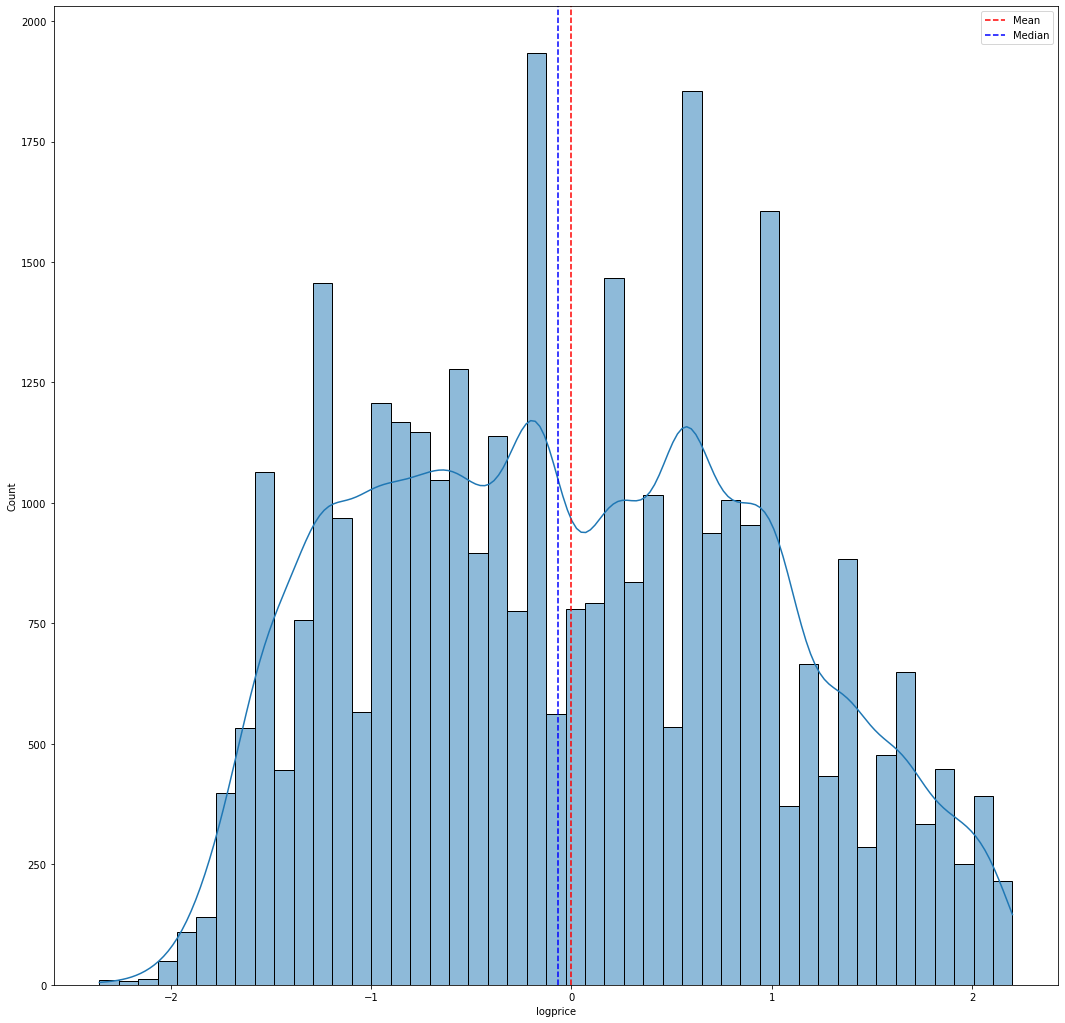

In [11]:
#look at logprice distribution again
plt.figure(figsize=(18,18))
ax = sns.histplot(x=df['logprice'], kde=True)
plt.axvline(x=df.logprice.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=df.logprice.median(), color='blue', linestyle='--', label='Median')
plt.legend()
plt.show()

# Train-Test Split

In order to avoid overfitting on the same dataset when we train and test our dataset, we will use scikit-learn's *train_test_split* to split our data into separate datasets for training and testing. We will split them on a 70:30 basis.

In [12]:
#extract features and labels
X = df.drop('logprice', axis=1)
y = df[['logprice']]

#create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [13]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(24406, 93) (24406, 1)
(10460, 93) (10460, 1)


# Building Models

**logprice** is a a continuously varying variable. Thus, we will be using regression algorithms from supervised learning. 
<br><br>
We will use the following models:
1. Linear Regression
2. Ridge Regression
3. k-Nearest Neighbor (kNN)
4. Random Forest

To quantify how well a regression models fits the dataset, we will use R-squared. We have specifically chosen this evaluation metric because our target variable is a logarithmic value and R-squared can tell us how well our model can predict it in percentage terms.
<br><br>
After, we will be using the k-fold cross Validation method to evaluate our models and choose the best model to move forward with.

## Linear Regression Model

In [14]:
#import linear regression
from sklearn.linear_model import LinearRegression

#instantiate linear regression model
lin = LinearRegression()

In [15]:
#fit regressor on training set
lin_model = lin.fit(X_train, y_train)

In [16]:
#evaluate the model
print(lin_model.score(X_train, y_train))

0.6360283199796651


Now, we will use the model to make predictions on the test set.

In [17]:
lin_predictions = lin.predict(X_test)

In [18]:
lin_predictions

array([[ 0.33178711],
       [ 0.89147949],
       [-1.27001953],
       ...,
       [ 0.828125  ],
       [-0.24707031],
       [-0.52966309]])

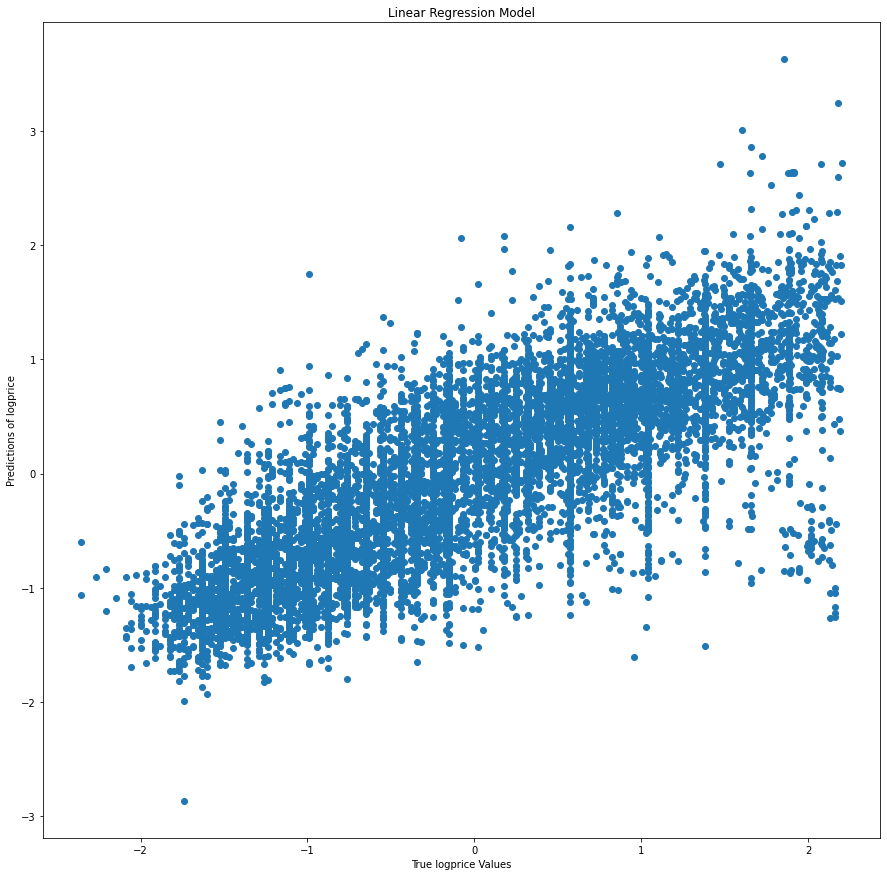

In [19]:
#plot the model
plt.figure(figsize=(15,15))
plt.scatter(y_test, lin_predictions)
plt.xlabel('True logprice Values')
plt.ylabel('Predictions of logprice')
plt.title('Linear Regression Model')
plt.show()

In [20]:
#then evaluate this model's performance using accuracy
print('Score:', lin_model.score(X_test, y_test))

Score: 0.6300678585226909


Now, we will perform cross validation to evaluate our model's performance.

In [21]:
#import cross validation score
from sklearn.model_selection import cross_val_score

#call cross_val_score
cv_results_li = cross_val_score(lin, X_train, y_train, cv=5, scoring='r2')

In [22]:
cv_results_li

array([-6.71027946e+05,  6.33692487e-01,  6.28472220e-01,  6.27593183e-01,
        6.41741547e-01])

The last four folds resulted in stable scores. However, the first score is concerning.

In [23]:
#mean R-squared score
np.mean(cv_results_li)

-134205.08296487035

From this, we can understand that linear regression is not the right model for our situation. This may be because we have many categorical features and, perhaps, a linear regression model is not the most well-suited for our purposes. 

## Ridge Regression Model

In [24]:
#import random forest
from sklearn.linear_model import Ridge

#instantiate random forest model
ri = Ridge(random_state=23)

In [25]:
#fit random fores regressor on training set
ri_model = ri.fit(X_train, y_train)

In [26]:
#evaluate the model
print(ri_model.score(X_train, y_train))

0.6361035257602974


Now, we will use the model to make predictions on the test set.

In [27]:
#do the model on the test set
ri_predictions = ri.predict(X_test)

In [28]:
ri_predictions

array([[ 0.3382281 ],
       [ 0.89285584],
       [-1.27656113],
       ...,
       [ 0.81451933],
       [-0.24265699],
       [-0.53230901]])

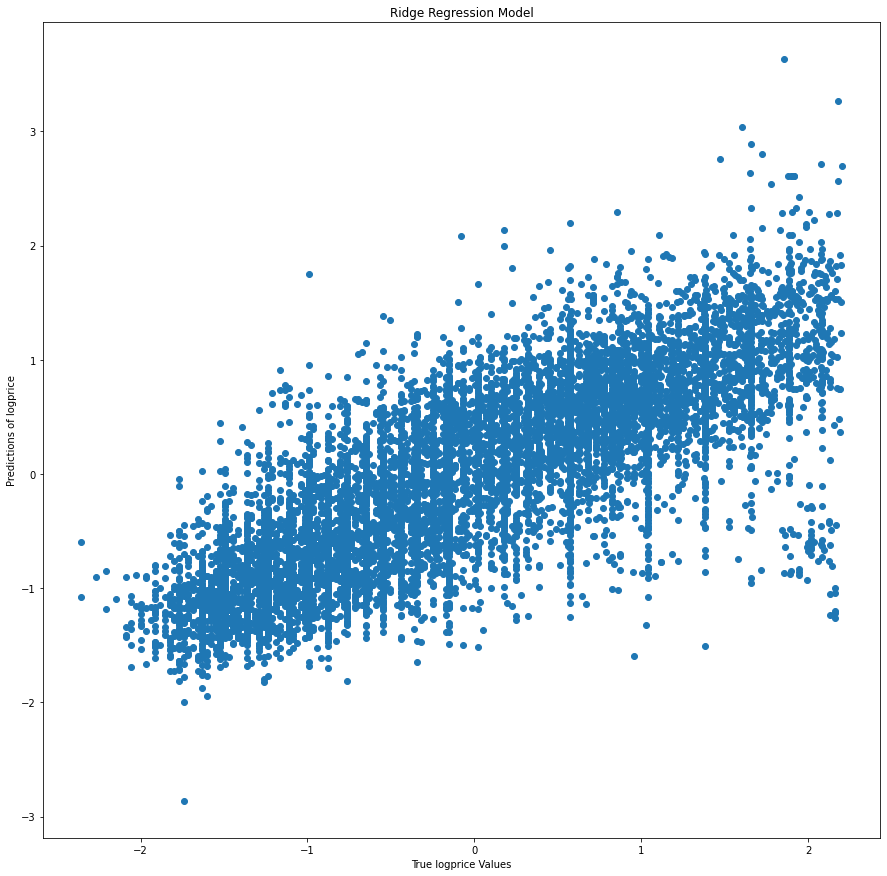

In [29]:
#plot the model
plt.figure(figsize=(15,15))
plt.scatter(y_test, ri_predictions)
plt.xlabel('True logprice Values')
plt.ylabel('Predictions of logprice')
plt.title('Ridge Regression Model')
plt.show()

In [30]:
#then evaluate this model's performance using accuracy
print('Score:', ri_model.score(X_test, y_test))

Score: 0.6300619985953781


Now, we will perform cross validation to evaluate our model's performance.

In [31]:
#cross validation
#import cross validation score
from sklearn.model_selection import cross_val_score

#call cross_val_score
cv_results_ri = cross_val_score(ri, X_train, y_train, cv=5, scoring='r2')

In [32]:
cv_results_ri

array([0.62802005, 0.63381942, 0.62963355, 0.62776228, 0.64163101])

In [33]:
#mean R-squared score
np.mean(cv_results_ri)

0.6321732625061735

## k-Nearest Neighbor (kNN) Model

In [34]:
#import kNN
from sklearn.neighbors import KNeighborsRegressor

#instantiate kNN model
knn = KNeighborsRegressor()

In [35]:
#fit kNN regressor on training set
knn_model = knn.fit(X_train, y_train.values.ravel())

In [36]:
#evaluate the model
print(knn_model.score(X_train, y_train))

0.7519623828073394


Now, we will use the model to make predictions on the test set.

In [37]:
#do the model on the test set
knn_predictions = knn.predict(X_test)

In [38]:
knn_predictions

array([-0.2583908 ,  1.03677981, -0.83208853, ..., -0.07093703,
       -1.10338908, -0.3558969 ])

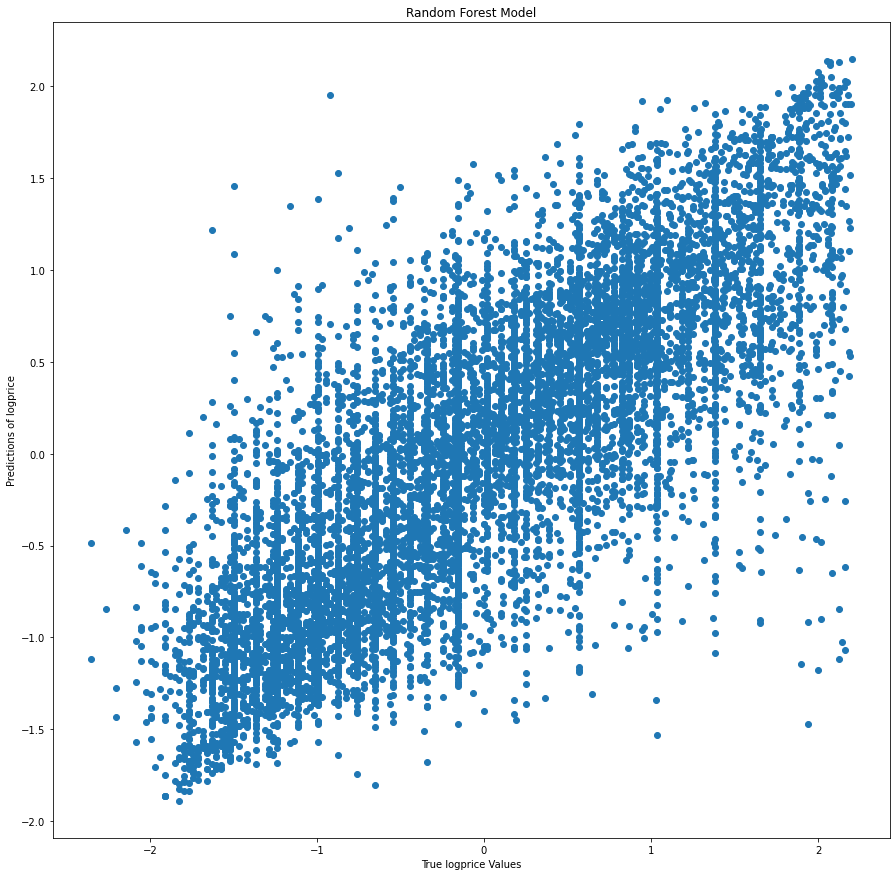

In [39]:
#plot the model
plt.figure(figsize=(15,15))
plt.scatter(y_test, knn_predictions)
plt.xlabel('True logprice Values')
plt.ylabel('Predictions of logprice')
plt.title('Random Forest Model')
plt.show()

In [40]:
#then evaluate this model's performance using accuracy
print('Score:', knn_model.score(X_test, y_test))

Score: 0.6273751382336016


Now, we will perform cross validation to evaluate our model's performance.

In [41]:
#cross validation
#import cross validation score
from sklearn.model_selection import cross_val_score

#call cross_val_score
cv_results_knn = cross_val_score(knn, X_train, y_train, cv=5, scoring='r2')

In [42]:
cv_results_knn

array([0.61336137, 0.62740788, 0.60130463, 0.60420591, 0.62248654])

In [43]:
#mean R-squared score
np.mean(cv_results_knn)

0.6137532669276821

## Random Forest Model

In [44]:
#import random forest
from sklearn.ensemble import RandomForestRegressor

#instantiate random forest model
rf = RandomForestRegressor(random_state=23)

In [45]:
#fit random forest regressor on training set
rf_model = rf.fit(X_train, y_train.values.ravel())

In [46]:
#evaluate the model
print(rf_model.score(X_train, y_train))

0.9614811574583061


Now, we will use the model to make predictions on the test set.

In [47]:
#do the model on the test set
rf_predictions = rf.predict(X_test)

In [48]:
rf_predictions

array([-0.35225099,  1.20207252, -0.87289779, ...,  0.5572408 ,
       -1.00868479, -1.13542569])

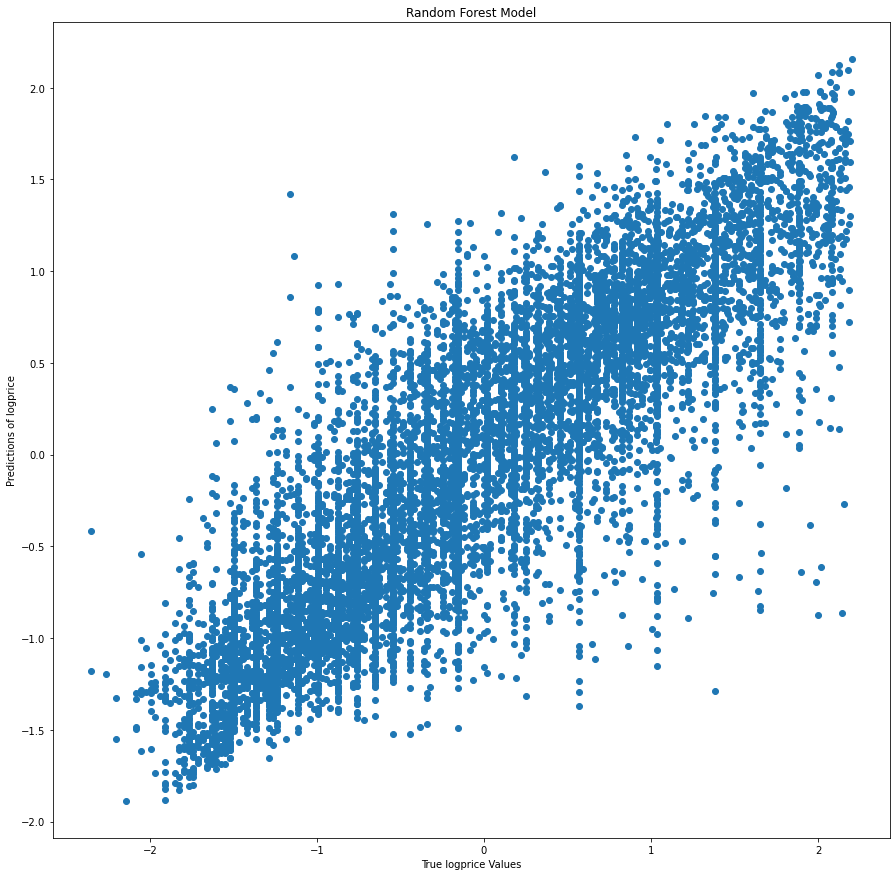

In [49]:
#plot the model
plt.figure(figsize=(15,15))
plt.scatter(y_test, rf_predictions)
plt.xlabel('True logprice Values')
plt.ylabel('Predictions of logprice')
plt.title('Random Forest Model')
plt.show()

In [50]:
#then evaluate this model's performance using accuracy
print('Score:', rf_model.score(X_test, y_test))

Score: 0.733847202077312


Now, we will perform cross validation to evaluate our model's performance.

In [51]:
#cross validation
#import cross validation score
from sklearn.model_selection import cross_val_score

#call cross_val_score
cv_results_rf = cross_val_score(rf, X_train, y_train.values.ravel(), cv=5, scoring='r2')

In [52]:
cv_results_rf

array([0.71717402, 0.72059761, 0.70427045, 0.72447526, 0.72762648])

In [53]:
#mean R-squared score
np.mean(cv_results_rf)

0.7188287643125306

## Putting the Models Side-by-Side

In [57]:
print('Average Cross Validation R-Squared Score for Linear Regression:', np.mean(cv_results_li))
print('Average Cross Validation R-Squared Score for Ridge Regression:', np.mean(cv_results_ri))
print('Average Cross Validation R-Squared Score for k-Nearest Neighbors:', np.mean(cv_results_knn))
print('Average Cross Validation R-Squared Score for Random Forest:', np.mean(cv_results_rf))

Average Cross Validation R-Squared Score for Linear Regression: -134205.08296487035
Average Cross Validation R-Squared Score for Ridge Regression: 0.6321732625061735
Average Cross Validation R-Squared Score for k-Nearest Neighbors: 0.6137532669276821
Average Cross Validation R-Squared Score for Random Forest: 0.7188287643125306


Thus, as it has the highest average cross validation R-squared score, the best performing model appears to be **Random Forest**.

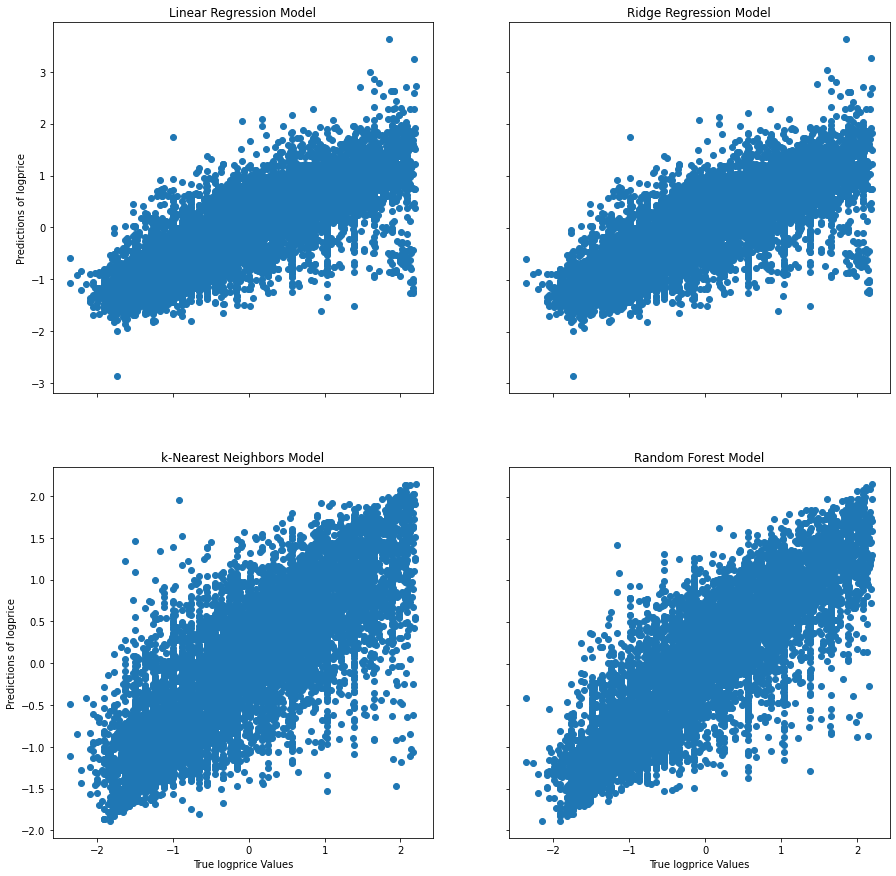

In [58]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

fig.set_figheight(15)
fig.set_figwidth(15)

ax1.scatter(y_test, lin_predictions)
ax1.set_xlabel('True logprice Values')
ax1.set_ylabel('Predictions of logprice')
ax1.set_title('Linear Regression Model')

ax2.scatter(y_test, ri_predictions)
ax2.set_xlabel('True logprice Values')
ax2.set_ylabel('Predictions of logprice')
ax2.set_title('Ridge Regression Model')

ax3.scatter(y_test, knn_predictions)
ax3.set_xlabel('True logprice Values')
ax3.set_ylabel('Predictions of logprice')
ax3.set_title('k-Nearest Neighbors Model')

ax4.scatter(y_test, rf_predictions)
ax4.set_xlabel('True logprice Values')
ax4.set_ylabel('Predictions of logprice')
ax4.set_title('Random Forest Model')

for ax in fig.get_axes():
    ax.label_outer()

# Conclusion

In order to predict the rental prices of Airbnb units in New York City from data obtained from InsideAirbnb. We have considered 94 features in order to predict our target variable. 
<br><br>
We have a regression probelm on our hands. Here, we have decided to try the following models on our dataset: <br>
• Linear Regression <br>
• Ridge Regression <br>
• k-Nearest Neighbors <br>
• Random Forest 
<br><br>
Each model was plotted and evaluated using R-squared and Cross Validation methods. 
<br><br>
We have concluded that, as it has the highest average cross validation R-squared score, the best performing model appears to be Random Forest.

# Future Direction

Ways to improve the model in the future: <br>
• Add specific features regarding the distance of the lsiting from various locations and amenities in NYC <br>
• Find a way to include more amenities provided in the listing during the prediction process <br>
• Use the location-based data more aptly 